<a href="https://colab.research.google.com/github/abhinethraRG/ARIMA-predicting-stock-prices/blob/main/ARIMA_Predicting_Spotify_(SPOT)_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML application to predict a stock price using ARIMA.**

Using ARIMA to predict the adjusted closing price of Spotify (SPOT) stock.

## 1. Installing libraries.
Installing necessary python libraries to build the model.

In [ ]:
!pip install yfinance
!pip install pmdarima

## 2. Importing libraries.
 Importing the necessary libraries.
 We're using yfinance to extract the stock price data.
 This code block installs and imports necessary libraries for fetching financial data, performing data manipulation and analysis, as well as conducting ARIMA (AutoRegressive Integrated Moving Average) modeling for time series forecasting.

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import pmdarima as pm
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 3. Collecting historical stock data.

The first step in building our predictive model is to collect historical stock data using yfinance library to get the historical stock prices of Spotify (SPOT) covering the period from January 1, 2020, to January 1, 2024.

In [ ]:
data = yf.download('SPOT', start='2020-01-01', end='2024-01-01')
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,151.000000,152.800003,149.610001,151.619995,151.619995,662600
2020-01-03,149.500000,153.589996,149.500000,152.500000,152.500000,1018400
2020-01-06,151.490005,157.000000,150.350006,156.720001,156.720001,1311900
2020-01-07,156.699997,157.850006,155.009995,156.020004,156.020004,876700
2020-01-08,156.330002,159.479996,155.339996,158.779999,158.779999,974500


## 4. Data Preprocessing
This section prepares the downloaded stock data for analysis by resetting the index, converting the 'Date' column to datetime format, setting it as the new index, and narrowing down the dataset to only include the 'Adj Close' price of the stocks.

In [ ]:
dataset_ex_df = data.copy()
dataset_ex_df = dataset_ex_df.reset_index()
dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
dataset_ex_df.set_index('Date', inplace=True)
dataset_ex_df = dataset_ex_df['Adj Close'].to_frame()

## 4.  Splitting the data into train and test sets.
Splitting the data into training and testing sets. Using the first 80% of the data
for training and the remaining 20% for testing.


In [ ]:
# Define the ARIMA model
def arima_forecast(history):
    # Fit the model
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()

    # Make the prediction
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

# Split data into train and test sets
X = dataset_ex_df.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

# Walk-forward validation
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    # Generate a prediction
    yhat = arima_forecast(history)
    predictions.append(yhat)
    # Add the predicted value to the training set
    obs = test[t]
    history.append(obs)

## 5. Building the model & selecting optimal ARIMA parameters.
This code block utilizes the auto_arima function to automatically determine the best ARIMA parameters for the model based on the dataset. This helps in identifying the most suitable model for forecasting.

In [ ]:
# Auto ARIMA to select optimal ARIMA parameters
model = pm.auto_arima(dataset_ex_df['Adj Close'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6609.352, Time=3.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6609.937, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6611.936, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6611.936, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6607.968, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6613.936, Time=0.26 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.785 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1006
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -3302.984
Date:                Sat, 06 Apr 2024   AIC                           6607.968
Time:                        01:32:21   BIC                           6612.881
Sample:                             0   HQIC                          6609.835
          

## 6. Evaluating the model (RMSE)

In [ ]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 3.7217344961539567


The RMSE of 3.72 indicates the model's forecasts are, on average, within 3.72 units of the actual values. For many stocks, this suggests the model is fairly accurate and useful for predicting prices within a reasonable error margin.

## 7. Visualization
Generates a plot to visualize and compare the actual vs. predicted stock prices, helping to assess the accuracy of the ARIMA model's forecasts.

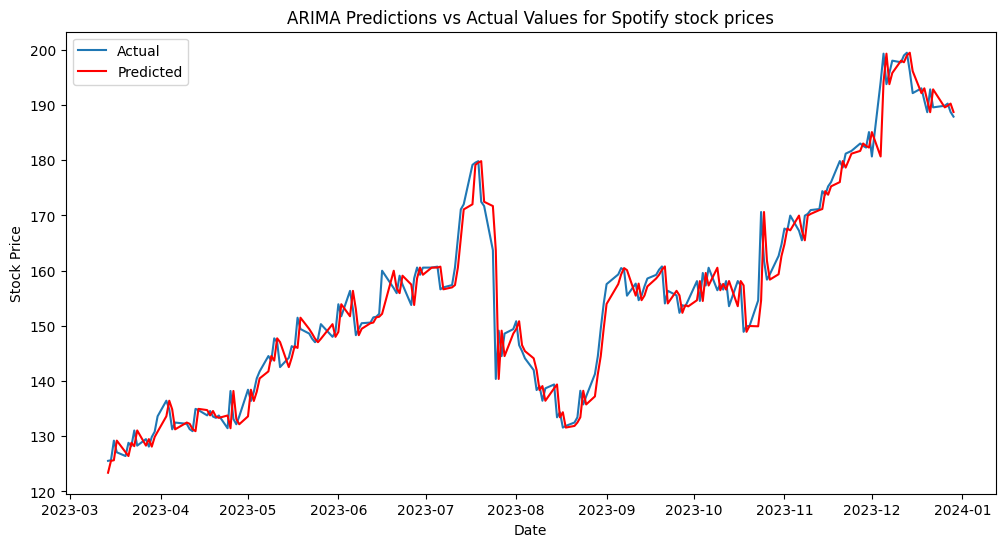

In [ ]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(dataset_ex_df.iloc[size:,:].index, test, label='Actual')
plt.plot(dataset_ex_df.iloc[size:,:].index, predictions, color='red', label='Predicted')
plt.title('ARIMA Predictions vs Actual Values for Spotify stock prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The plot shows the ARIMA model's predictions closely tracking the actual stock prices over period of March 2023 to Jan 2024. The predictions are pretty close to the real numbers, showing that our model does a good job of guessing where the stock price might go. There are a few spots where the model's guess and the real price don't match up perfectly, which is normal because stock prices can change quickly. But overall, the model gives us a good idea about the trend of the stock price.

## 8. Predicting for a date in the future.
Predicts the stock price for a specific future date using the ARIMA model.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model_arima = ARIMA(dataset_ex_df['Adj Close'], order=(0, 1, 0))
model_arima_fit = model_arima.fit()

# Calculate the number of days to forecast ahead
last_date = pd.to_datetime('2024-01-01')
target_date = pd.to_datetime('2024-03-05') #chosen date, i.e., March 1, 2024
delta_days = (target_date - last_date).days

# Forecast the stock price for chosen date
forecast = model_arima_fit.forecast(steps=delta_days)
if isinstance(forecast, pd.Series):
    predicted_value = forecast.iloc[-1]
else:
    predicted_value = forecast

print(f"Predicted stock price for March 1, 2024: {predicted_value}")


Predicted stock price for March 1, 2024: 187.91000366210938


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

## 9. Recommendation based on the prediction.
This code generates Buy, Sell, or Hold recommendations for a stock based on whether its forecasted price is expected to change from the current price, aiming to guide investment decisions.

In [ ]:
# Get the most recent date and its corresponding Adj Close price
# Assuming the Date column contains datetime objects
current_price = df['Adj Close'].iloc[-1]

print("Current price:", current_price)

# Define your recommendation thresholds
sell_threshold = current_price * 0.95  # Example: sell if predicted price is 5% lower than current price
buy_threshold = current_price * 1.05   # Example: buy if predicted price is 5% higher than current price

# Make recommendation based on predicted price
if predicted_value< sell_threshold:
    recommendation = "Sell"
elif predicted_value > buy_threshold:
    recommendation = "Buy"
else:
    recommendation = "Hold"

print("Predicted price:", predicted_value)
print("Current price:", current_price)
print("Recommendation:", recommendation)

Current price: 130.2210693359375
Predicted price: 187.91000366210938
Current price: 130.2210693359375
Recommendation: Buy


**Comments on recommendation:**
Based on the output, the predicted stock price is significantly higher than the current price, indicating a strong positive forecast for the stock's future value. With the predicted price surpassing the buy threshold; set at a 5% increase from the current price, the recommendation is to "Buy." This suggests optimism about the stock's potential for growth, making it a potentially profitable investment opportunity according to the model's prediction.